In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def importdata(DF):
    data = pd.read_csv(DF)
    X_train = data.drop(['class','id'],axis='columns')
    y_train = data['class']
    data2 = pd.read_csv("csv_result-monks_test.csv")
    X_test = data2.drop(['class','id'],axis='columns')
    y_test = data2['class']

    return X_train,y_train,X_test,y_test


In [3]:
def train_using_gini(X_train, X_test, y_train):
  
   
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [4]:
def tarin_using_entropy(X_train, X_test, y_train):
  
    
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [5]:
def prediction(X_test, clf_object):
  
    
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred

In [6]:

def cal_accuracy(y_test, y_pred):
    CM = confusion_matrix(y_test, y_pred) 
    print("Confusion Matrix: ",CM,'\n')
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100,'\n')
      
    print("Report : ",
    classification_report(y_test, y_pred),'\n')

Dataset :  csv_result-monks_t10.csv 

Results Using Gini Index:
Confusion Matrix:  [[  0 216]
 [  0 216]] 

Accuracy :  50.0 

Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.50      1.00      0.67       216

    accuracy                           0.50       432
   macro avg       0.25      0.50      0.33       432
weighted avg       0.25      0.50      0.33       432
 

Results Using Entropy:
Confusion Matrix:  [[  0 216]
 [  0 216]] 

Accuracy :  50.0 

Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.50      1.00      0.67       216

    accuracy                           0.50       432
   macro avg       0.25      0.50      0.33       432
weighted avg       0.25      0.50      0.33       432
 



c:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------------------------------------------------------

Dataset :  csv_result-monks_t20.csv 

Results Using Gini Index:
Confusion Matrix:  [[144  72]
 [144  72]] 

Accuracy :  50.0 

Report :                precision    recall  f1-score   support

           0       0.50      0.67      0.57       216
           1       0.50      0.33      0.40       216

    accuracy                           0.50       432
   macro avg       0.50      0.50      0.49       432
weighted avg       0.50      0.50      0.49       432
 

Results Using Entropy:
Confusion Matrix:  [[144  72]
 [144  72]] 

Accuracy :  50.0 

Report :                precision    recall  f1-score   support

           0       0.50      0.67      0.57       216
           1       0.50      0.33      0.40       216

    accuracy                           0.50       432
   macro avg       0.50      0.50      0.49       432
weighted avg       0.50      0.50      0.49       432
 

--------

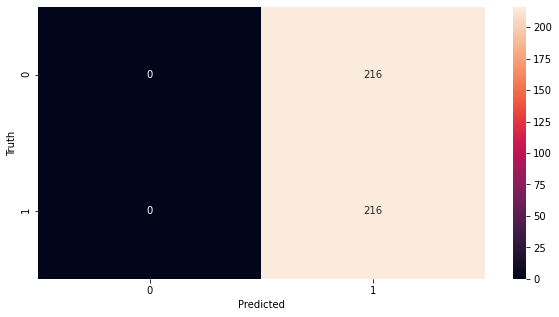

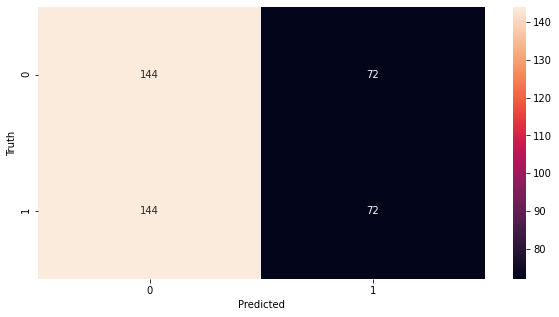

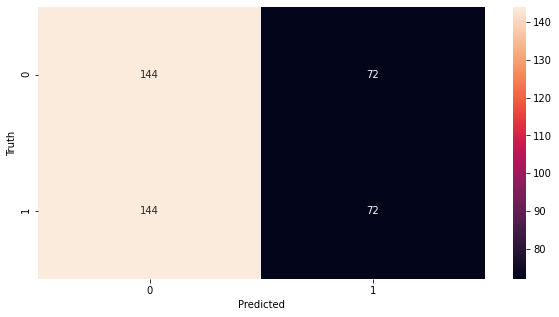

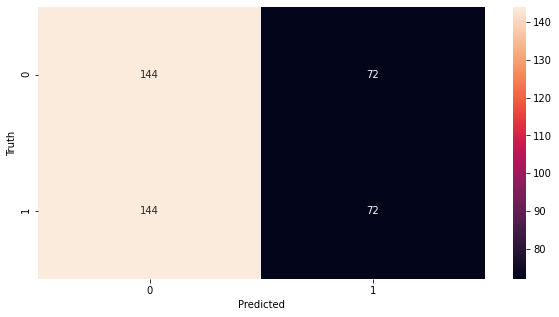

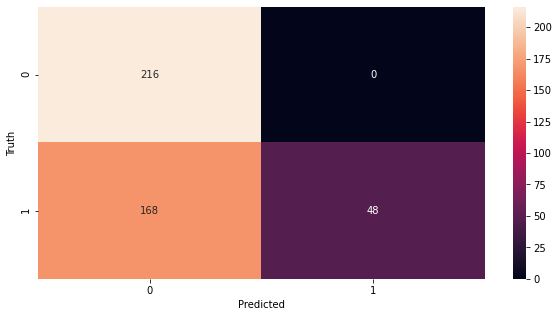

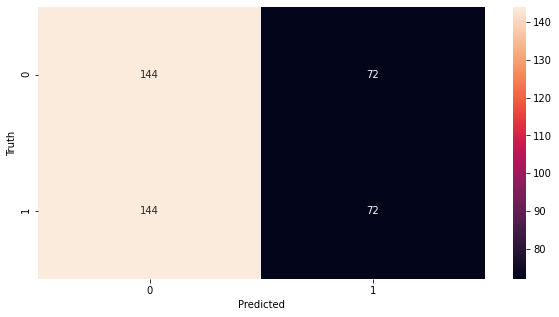

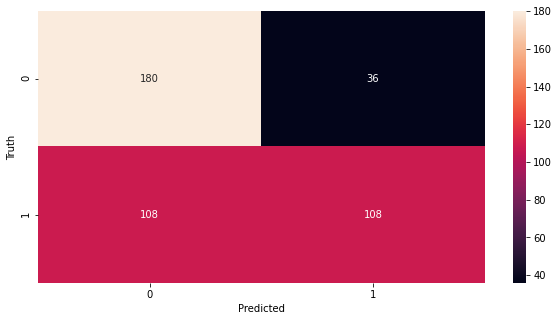

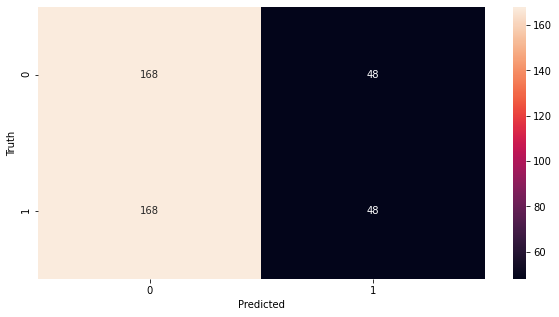

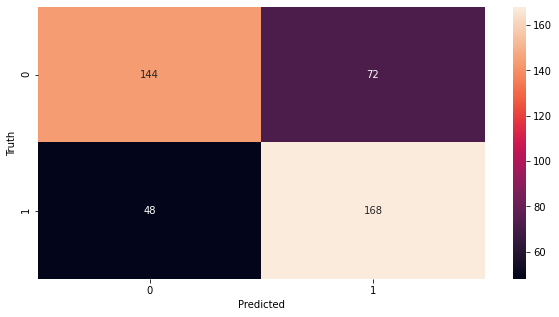

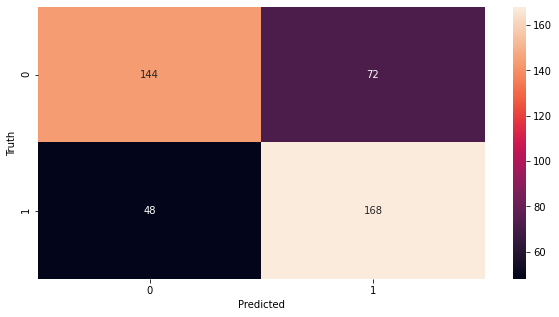

In [7]:
DF = ["csv_result-monks_t10.csv", "csv_result-monks_t20.csv", "csv_result-monks_t30.csv",
      "csv_result-monks_t40.csv", "csv_result-monks_t50.csv", "csv_result-monks_t60.csv",
      "csv_result-monks_t70.csv", "csv_result-monks_t80.csv", "csv_result-monks_t90.csv", "csv_result-monks_t100.csv"]
for index in range(len(DF)):      
    # Building Phase
    print("Dataset : ", DF[index], '\n')
    X_train,y_train,X_test,y_test = importdata(DF[index])
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
   
    print("Results Using Gini Index:")
      
    
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
    plt.figure(figsize = (10,5))
    sn.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print("---------------------------------------------------------------------------------------------------\n")  
      
print("FINISH")

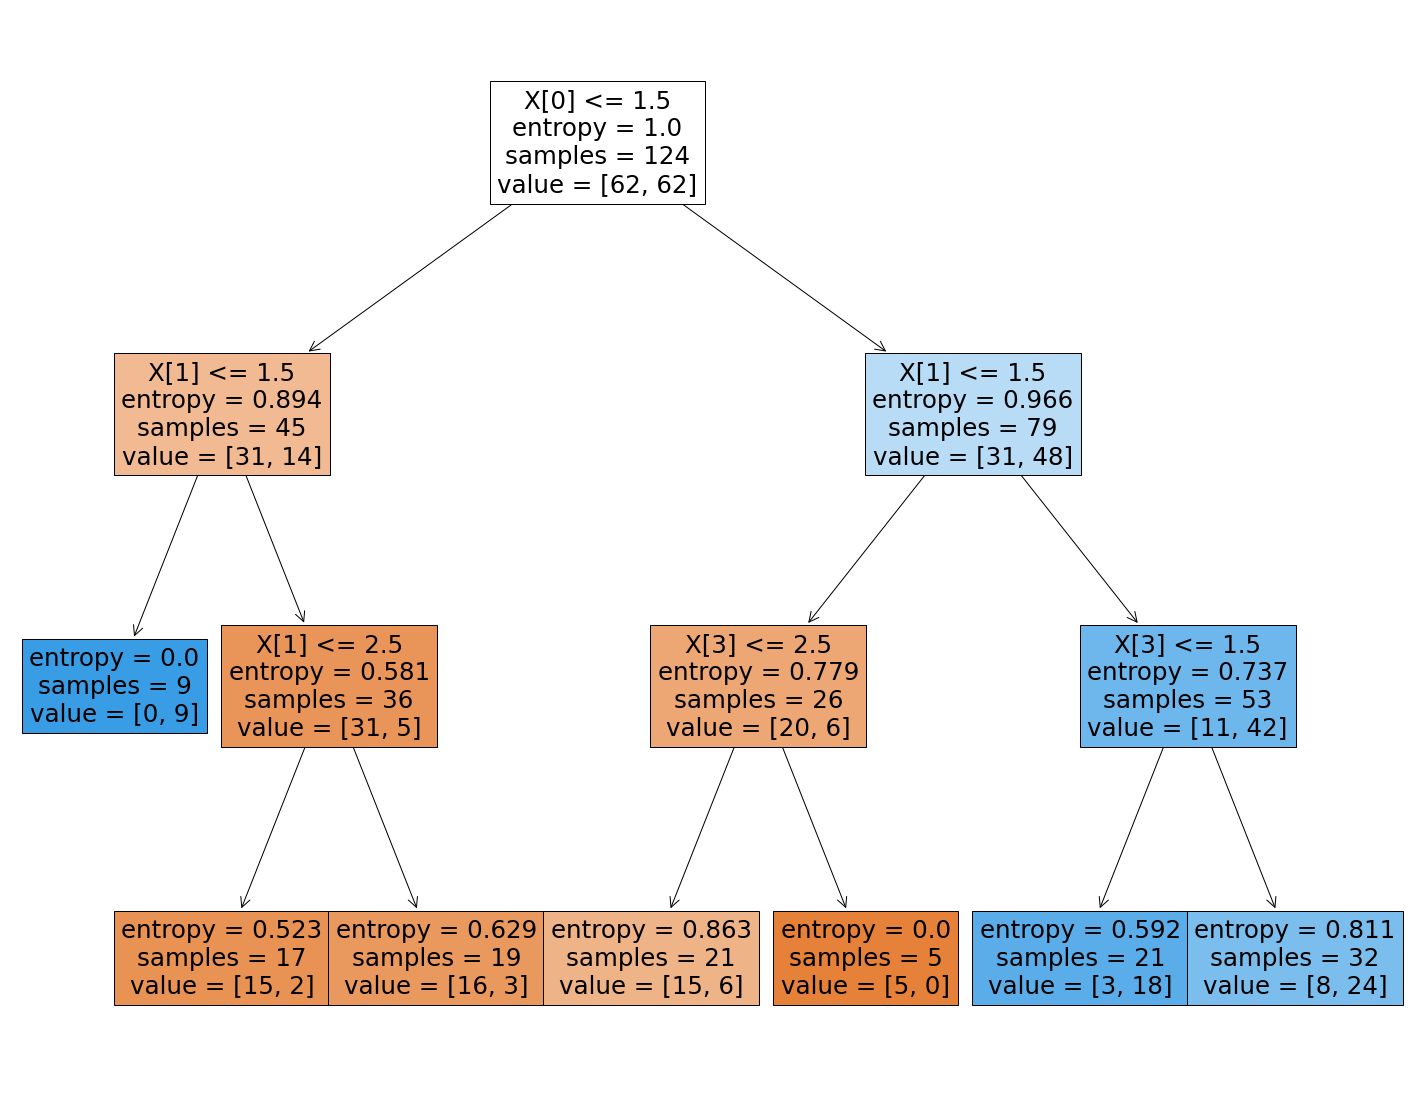

In [8]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf_entropy, 
                   filled=True)


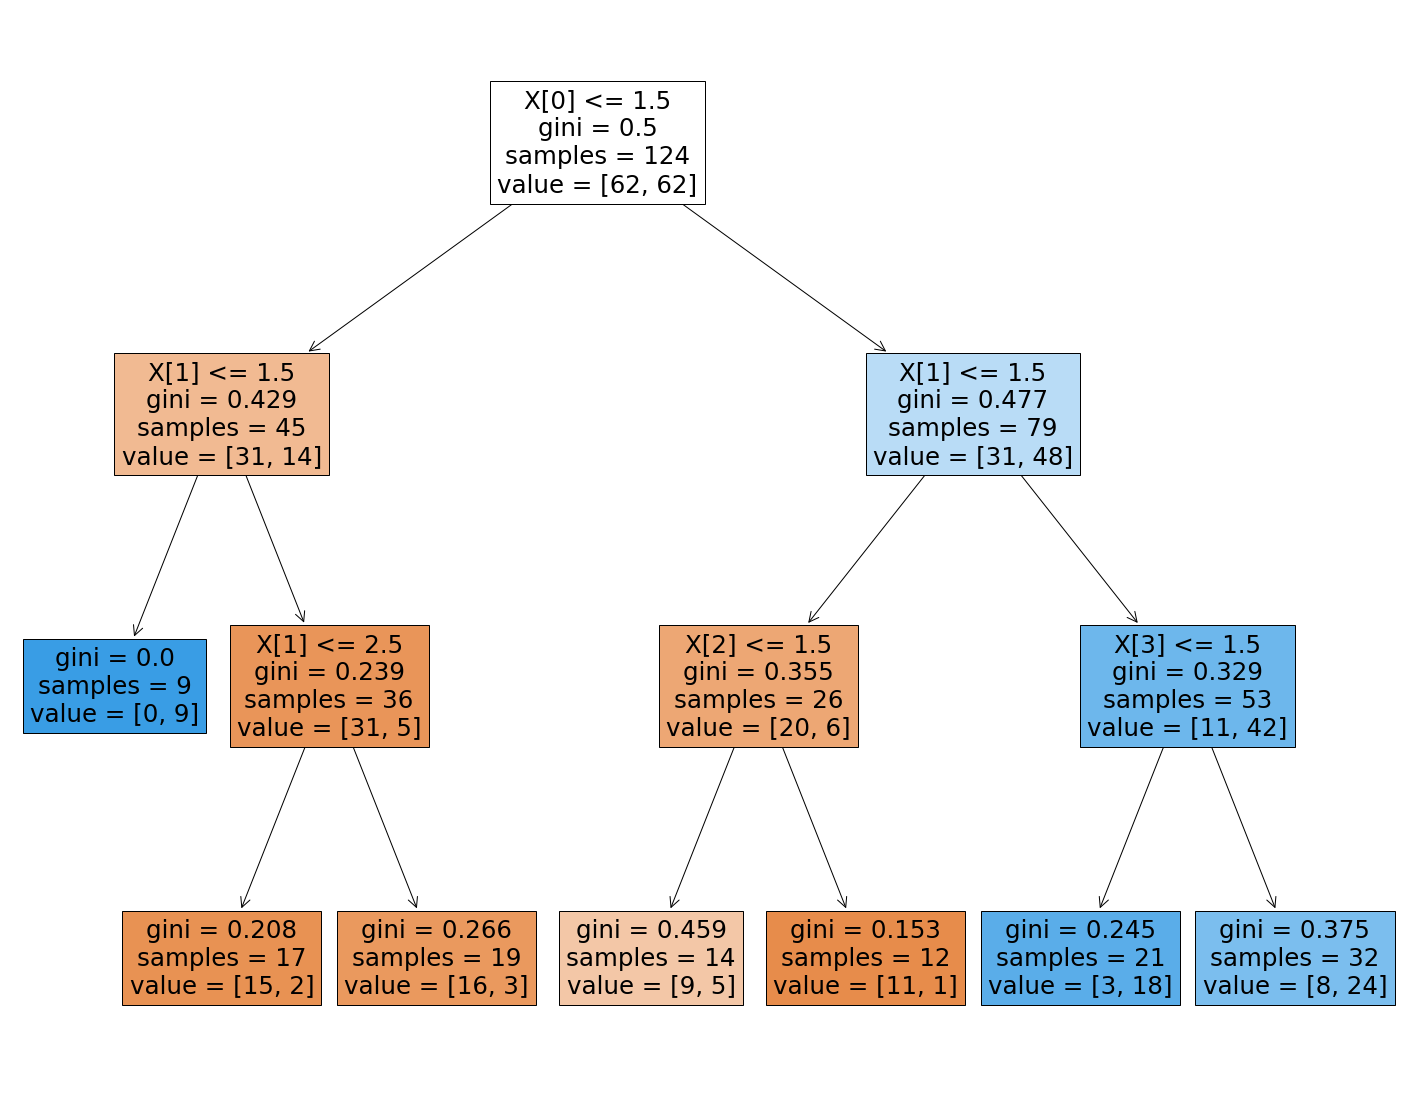

In [9]:
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf_gini, 
                   filled=True)
